In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "./Unemployment in India.csv"
data = pd.read_csv(url)
data.head()

,Region,Date,Frequency,EstimatedUnemploymentRate,EstimatedEmployed,EstimatedLabourParticipationRate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
data.shape

(754, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region                            740 non-null    object 
 1   Date                              740 non-null    object 
 2   Frequency                         740 non-null    object 
 3   EstimatedUnemploymentRate         740 non-null    float64
 4   EstimatedEmployed                 740 non-null    float64
 5   EstimatedLabourParticipationRate  740 non-null    float64
 6   Area                              740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [8]:
data.describe

<bound method NDFrame.describe of              Region         Date Frequency  EstimatedUnemploymentRate  \
0    Andhra Pradesh   31-05-2019   Monthly                       3.65   
1    Andhra Pradesh   30-06-2019   Monthly                       3.05   
2    Andhra Pradesh   31-07-2019   Monthly                       3.75   
3    Andhra Pradesh   31-08-2019   Monthly                       3.32   
4    Andhra Pradesh   30-09-2019   Monthly                       5.17   
..              ...          ...       ...                        ...   
749     West Bengal   29-02-2020   Monthly                       7.55   
750     West Bengal   31-03-2020   Monthly                       6.67   
751     West Bengal   30-04-2020   Monthly                      15.63   
752     West Bengal   31-05-2020   Monthly                      15.22   
753     West Bengal   30-06-2020   Monthly                       9.86   

     EstimatedEmployed  EstimatedLabourParticipationRate   Area  
0           11999139.0 

In [9]:
data.isnull().sum()

Region                              14
Date                                14
Frequency                           14
EstimatedUnemploymentRate           14
EstimatedEmployed                   14
EstimatedLabourParticipationRate    14
Area                                14
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.shape

(740, 7)

In [12]:
data.isnull().sum()

Region                              0
Date                                0
Frequency                           0
EstimatedUnemploymentRate           0
EstimatedEmployed                   0
EstimatedLabourParticipationRate    0
Area                                0
dtype: int64

In [13]:
avg_unemployment = data.groupby('Region')['EstimatedUnemploymentRate'].mean()
avg_unemployment

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: EstimatedUnemploymentRate, dtype: float64

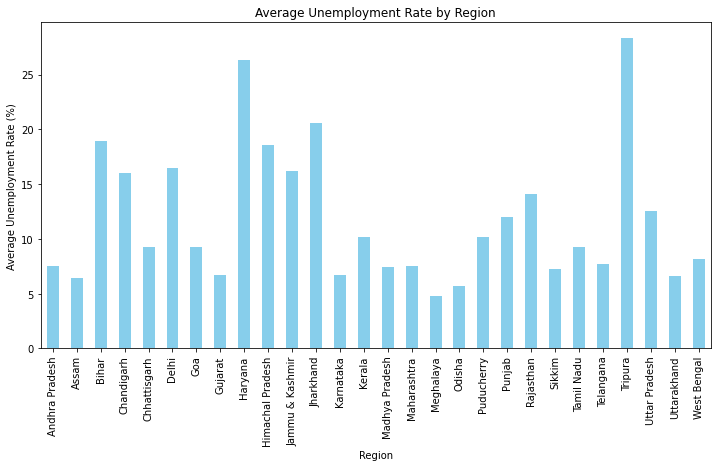

In [14]:
plt.figure(figsize=(12, 6))
avg_unemployment.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

C:\Users\bhuva\AppData\Local\Temp/ipykernel_8772/1102450863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


,Region,Date,Frequency,EstimatedUnemploymentRate,EstimatedEmployed,EstimatedLabourParticipationRate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [17]:
data = data[['Date', 'Region', 'EstimatedUnemploymentRate']]
data.head()

,Date,Region,EstimatedUnemploymentRate
0,2019-05-31,Andhra Pradesh,3.65
1,2019-06-30,Andhra Pradesh,3.05
2,2019-07-31,Andhra Pradesh,3.75
3,2019-08-31,Andhra Pradesh,3.32
4,2019-09-30,Andhra Pradesh,5.17


In [18]:
train, test = train_test_split(data, test_size=0.2, shuffle=False)

In [19]:
#Time series decomposition
decomposition = seasonal_decompose(train.set_index('Date')['EstimatedUnemploymentRate'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [21]:
model = SARIMAX(train.set_index('Date')['EstimatedUnemploymentRate'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

c:\Users\bhuva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhuva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhuva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bhuva\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

In [22]:
results = model.fit()

In [24]:
start_date = test['Date'].min()
end_date = test['Date'].max()
forecast_index = pd.date_range(start=start_date, periods=len(test), freq='M')
forecast = results.get_forecast(steps=len(test), index=forecast_index)

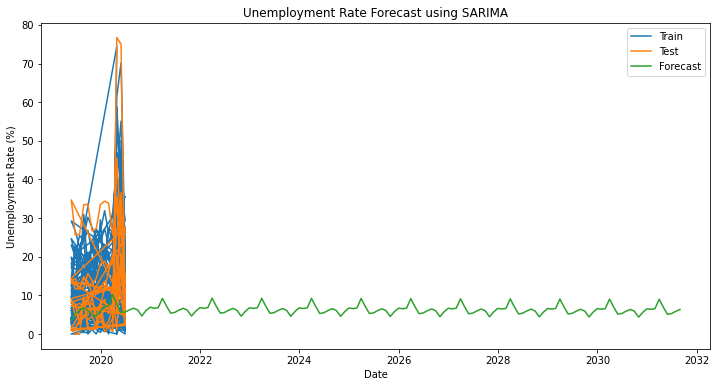

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(train.set_index('Date')['EstimatedUnemploymentRate'], label='Train')
plt.plot(test.set_index('Date')['EstimatedUnemploymentRate'], label='Test')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.title('Unemployment Rate Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

In [27]:
mse = mean_squared_error(test['EstimatedUnemploymentRate'], forecast.predicted_mean)
print('Mean Squared Error:',mse)

Mean Squared Error: 180.851862656109
